In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import glob

In [13]:
glob.glob(r'D:\Data Analytics\Projects\S&P 500\individual_stocks_5yr/*csv')

['D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\AAL_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\AAPL_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\AAP_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\ABBV_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\ABC_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\ABT_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\ACN_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\ADBE_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\ADI_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\ADM_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\ADP_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\ADSK_data.csv',
 'D:\\Data Analytics\\Projects\\S&P 500\\individ

In [14]:
len (glob.glob(r'D:\Data Analytics\Projects\S&P 500\individual_stocks_5yr/*csv'))

509

In [15]:
company_list = [
    r'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\AAPL_data.csv',
    r'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\AMZN_data.csv',
    r'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\GOOG_data.csv',
    r'D:\\Data Analytics\\Projects\\S&P 500\\individual_stocks_5yr\\MSFT_data.csv',
]

In [16]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
all_data = pd.DataFrame()

for file in company_list:
   current_df = pd.read_csv(file)

   all_data = pd.concat([all_data , current_df], ignore_index=True)

In [24]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [25]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [26]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [28]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [29]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [30]:
tech_list = all_data['Name'].unique()

## Change in Price over time

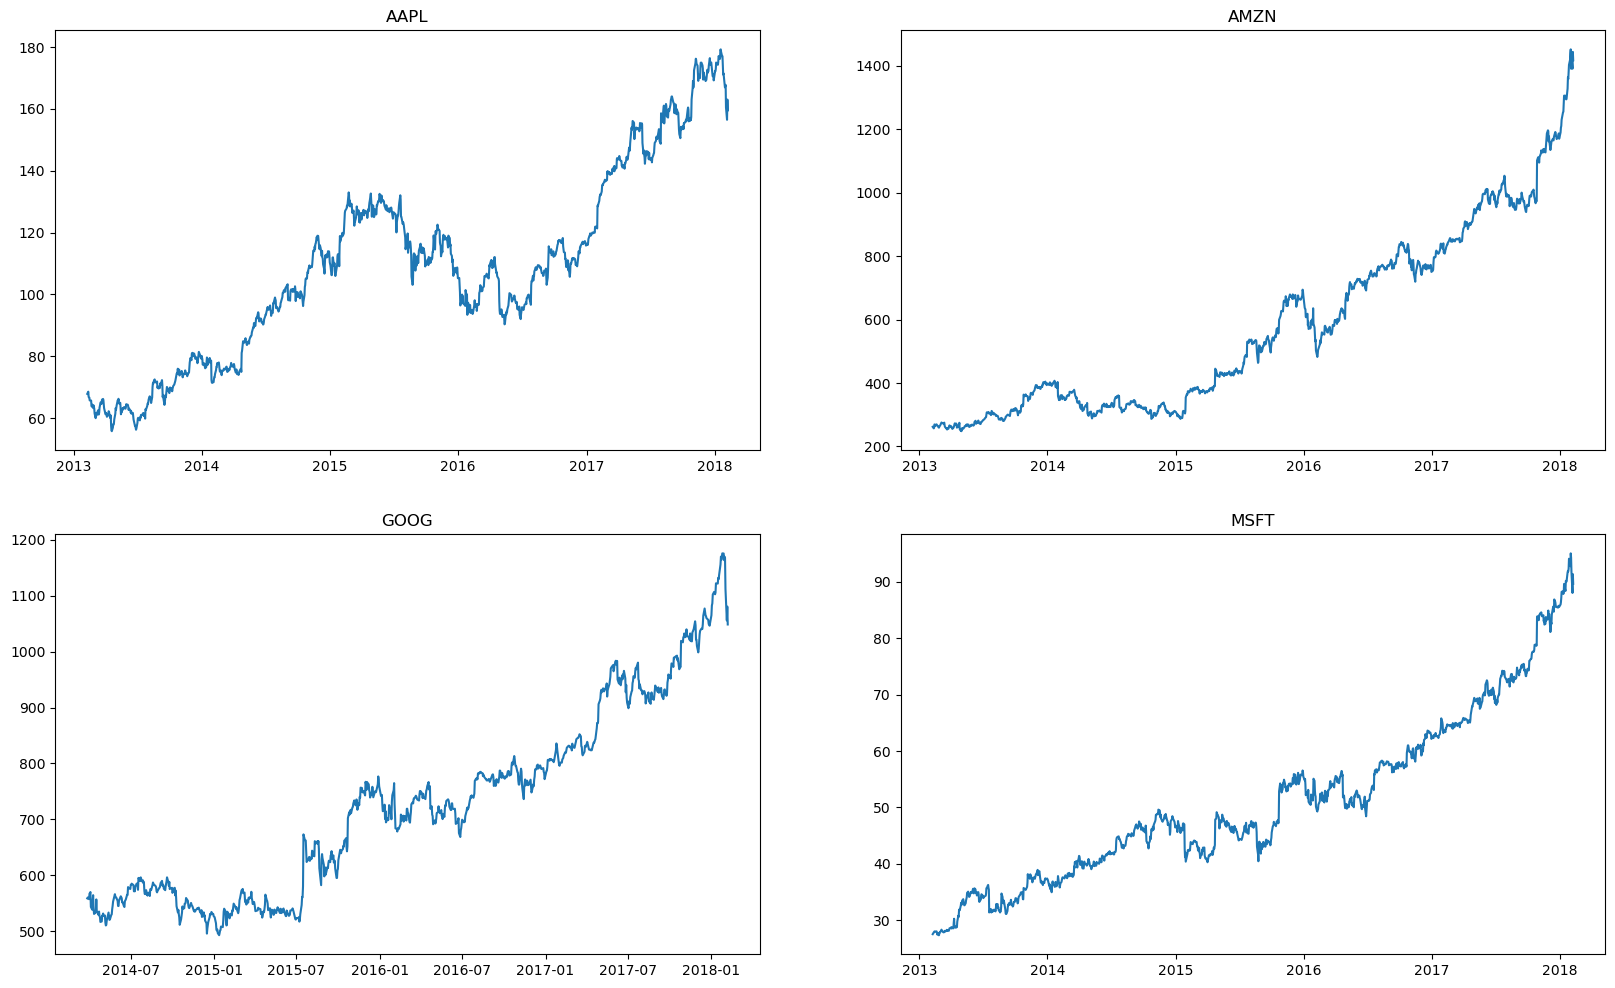

In [35]:
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1=all_data['Name']== company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

## Moving Average Analyis

In [37]:
all_data['close'].rolling(window=10).mean().head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
14    63.91538
Name: close, dtype: float64

In [47]:
new_data = all_data.copy()

In [49]:
ma_day = [10, 20, 50]

for ma in ma_day:
   new_data['close_' + str(ma)] = new_data['close'].rolling(ma).mean()

In [50]:
new_data.tail(15)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4737,2018-01-18,89.800,90.670,89.6600,90.10,24159683,MSFT,88.589,87.1460,85.2012
4738,2018-01-19,90.140,90.610,89.6600,90.00,36875013,MSFT,88.878,87.3545,85.3118
4739,2018-01-22,90.000,91.620,89.7400,91.61,23601555,MSFT,89.220,87.6590,85.4586
4740,2018-01-23,91.900,92.300,91.5400,91.90,23412841,MSFT,89.582,87.9790,85.6054
4741,2018-01-24,92.550,93.430,91.5800,91.82,33277483,MSFT,89.942,88.2945,85.7600
4742,2018-01-25,92.465,93.240,91.9300,92.33,26383238,MSFT,90.393,88.6410,85.9292
4743,2018-01-26,93.120,94.060,92.5800,94.06,29172167,MSFT,90.991,89.0585,86.1318
4744,2018-01-29,95.140,95.450,93.7200,93.92,31569940,MSFT,91.423,89.4685,86.3292
4745,2018-01-30,93.300,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.750,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606


In [51]:
new_data.set_index('date', inplace=True)

In [52]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


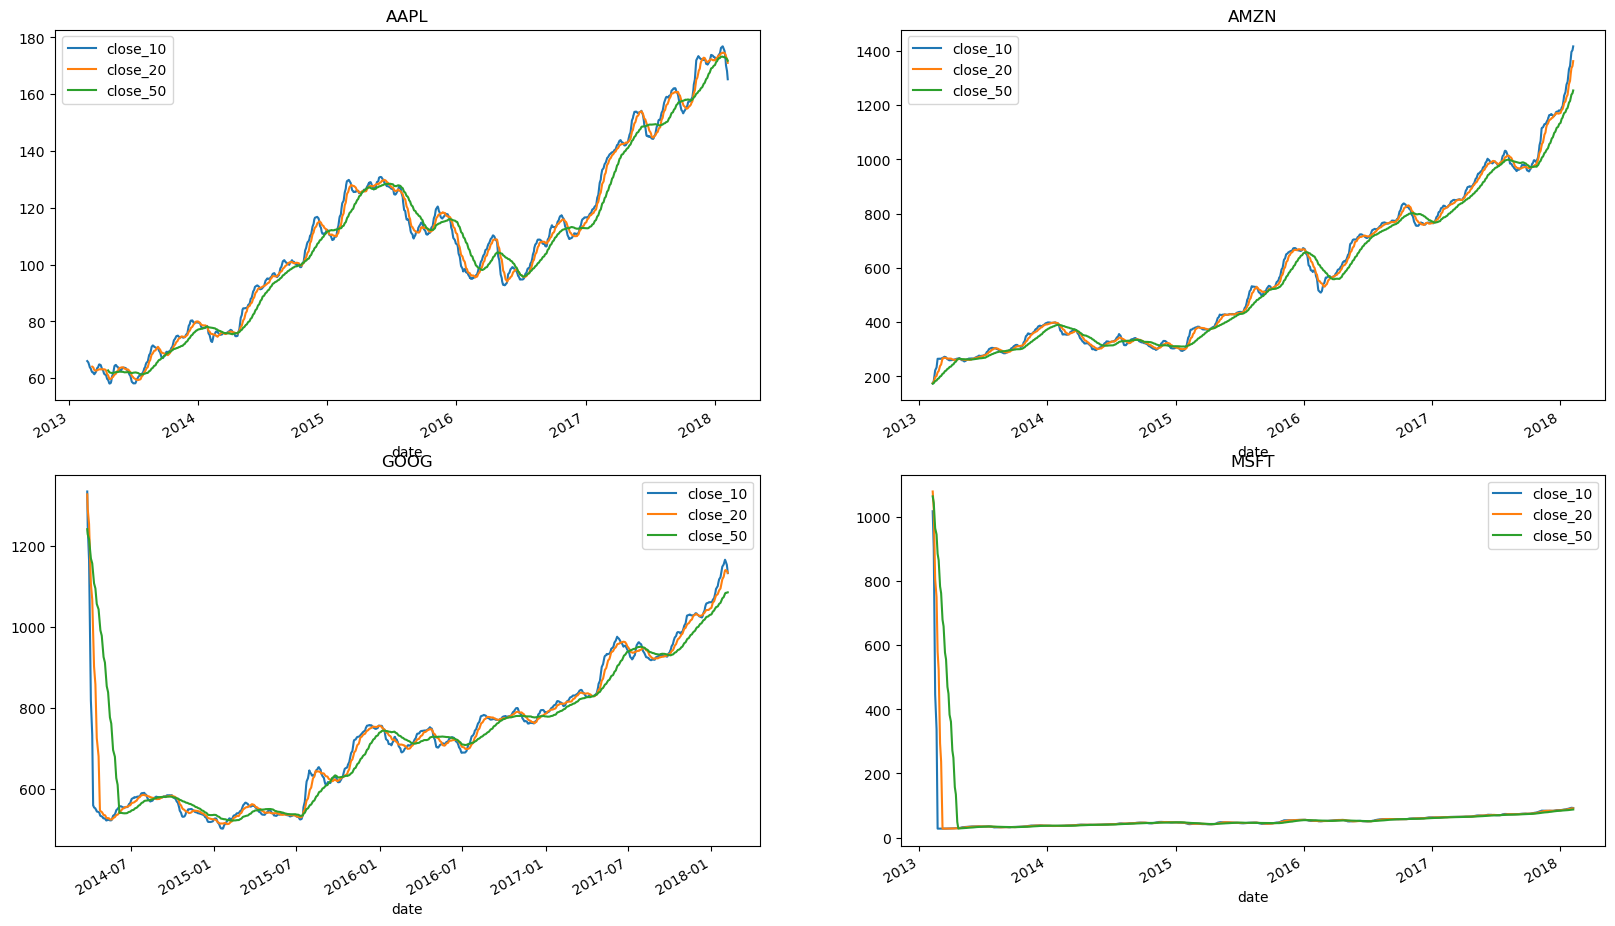

In [53]:
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1=new_data['Name']== company
    df = new_data[filter1]
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

## Closing Price Change Analysis

In [56]:
apple = pd.read_csv(r'D:\\\\Data Analytics\\\\Projects\\\\S&P 500\\\\individual_stocks_5yr\\\\AAPL_data.csv')

In [64]:
apple["Daily_return(%)"] = apple['close'].pct_change()*100

In [65]:
apple.head(5)

,date,open,high,low,close,volume,Name,Daily_return(%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [61]:
import plotly.express as px

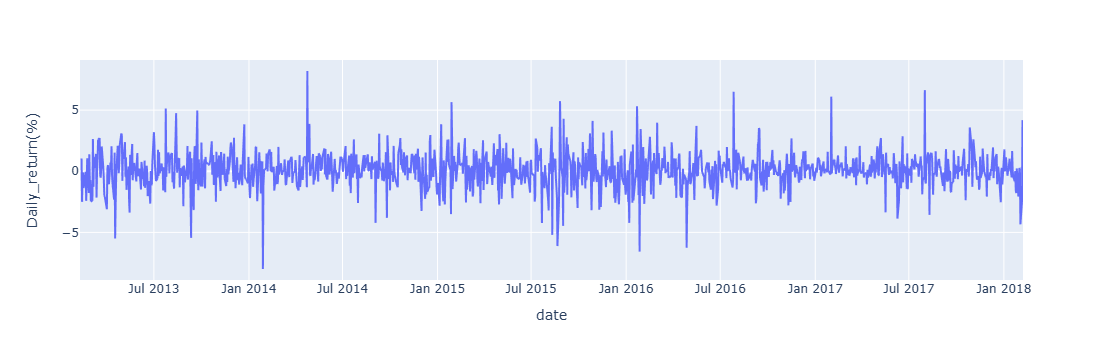

In [63]:
px.line(apple, x="date", y="Daily_return(%)")

## Resampling Analysis of Closing Price

In [67]:
apple['date'] = pd.to_datetime(apple['date'])

In [68]:
apple.set_index('date', inplace=True)

<Axes: xlabel='date'>

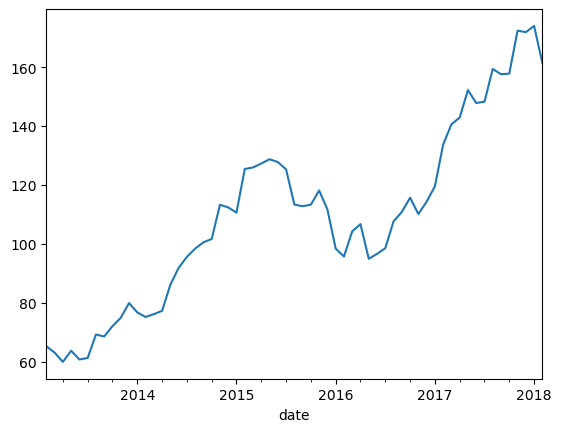

In [74]:
apple['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

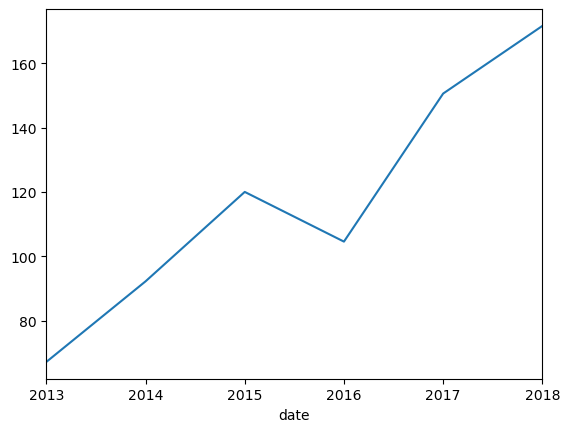

In [75]:
apple['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

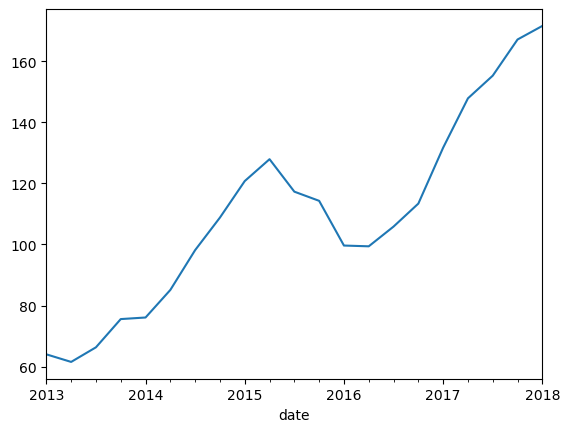

In [78]:
apple['close'].resample('Q').mean().plot()

## Multi Variate Analysis to understand Corelation

In [80]:
company_list

['D:\\\\Data Analytics\\\\Projects\\\\S&P 500\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\Data Analytics\\\\Projects\\\\S&P 500\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'D:\\\\Data Analytics\\\\Projects\\\\S&P 500\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'D:\\\\Data Analytics\\\\Projects\\\\S&P 500\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [95]:
appl = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
goog = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [108]:
closing_price = pd.DataFrame()

In [109]:
closing_price['appl_close'] = appl['close']
closing_price['amzn_close'] = amzn['close']
closing_price['google_close'] = goog['close']
closing_price['msft_close'] = msft['close']

In [110]:
closing_price

,appl_close,amzn_close,google_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


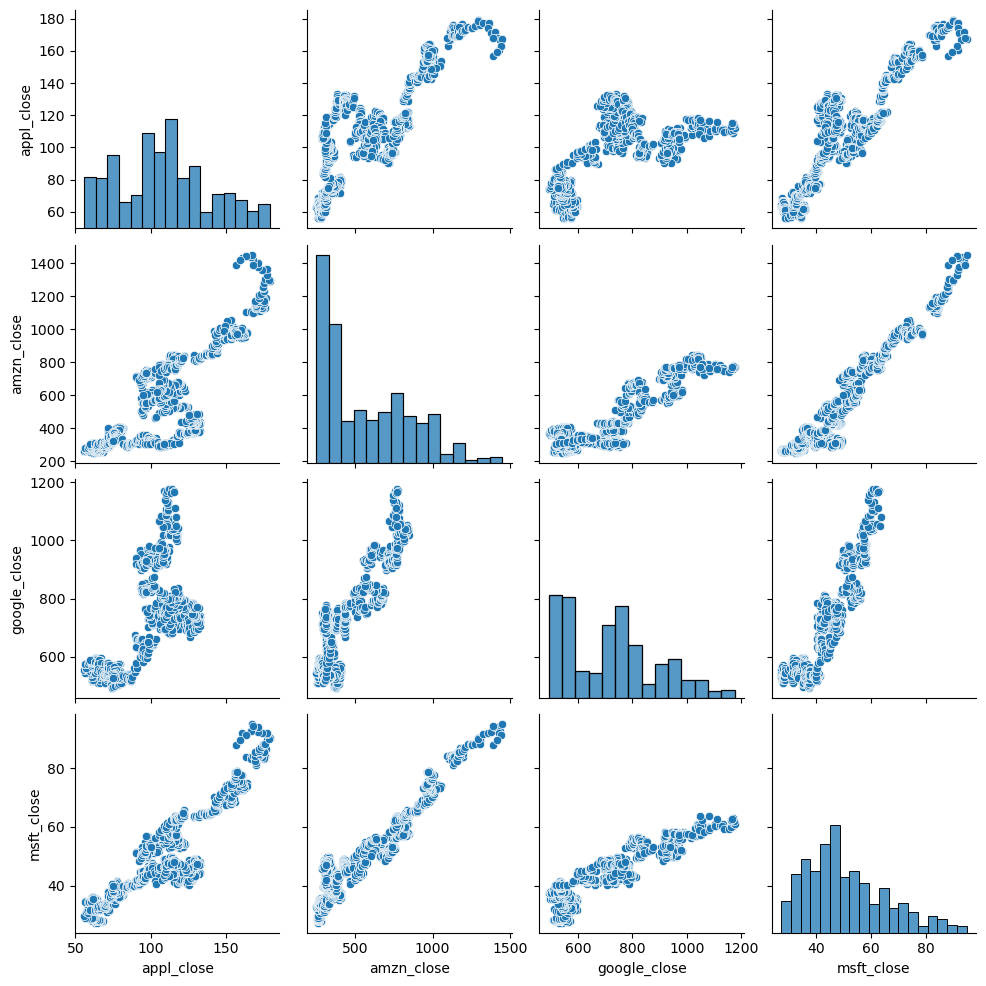

In [111]:
sns.pairplot(closing_price)

In [112]:
closing_price.corr()

,appl_close,amzn_close,google_close,msft_close
appl_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

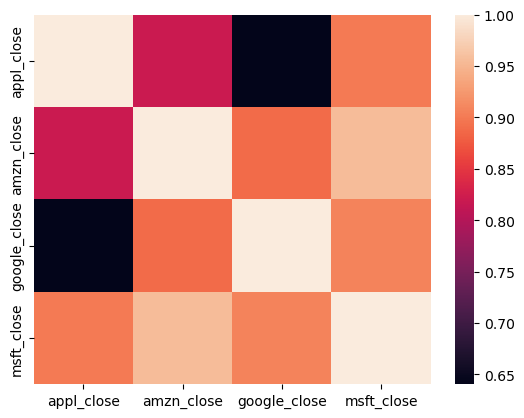

In [123]:
sns.heatmap(closing_price.corr())
